In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cat = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat.shape

(375, 500, 3)

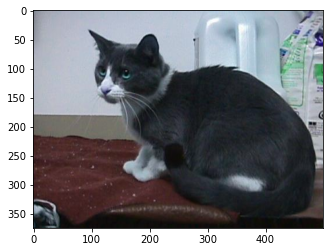

In [4]:
plt.imshow(cat)

In [5]:
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

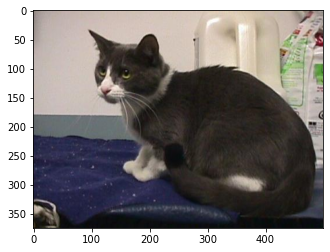

In [6]:
plt.imshow(cat)

In [7]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [8]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

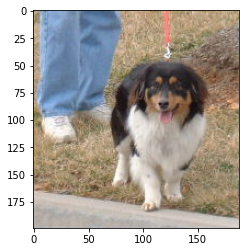

In [9]:
plt.imshow(dog)

In [10]:
dog.shape

(199, 188, 3)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale = 1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

done


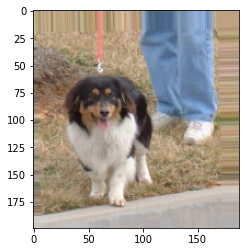

In [13]:
plt.imshow(image_gen.random_transform(dog))
print('done')

In [14]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory('CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [16]:
input_shape = (150,150,3)

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [28]:
model = Sequential()

# Conv block 1
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv block 2
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv block 3
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [22]:
input_shape[:2]

(150, 150)

In [23]:
batch_size = 32

train_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                         target_size=input_shape[:2],
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 18743 images belonging to 2 classes.


In [24]:
test_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                         target_size=input_shape[:2],
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 6251 images belonging to 2 classes.


In [25]:
train_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [26]:
results = model.fit_generator(train_gen,epochs=5,steps_per_epoch=100,validation_data=test_gen,validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
  5/100 [>.............................] - ETA: 1:51 - batch: 2.0000 - size: 32.0000 - loss: 0.7310 - acc: 0.5063

KeyboardInterrupt: 

In [ ]:
type(results)

In [ ]:
print(results.history['accuracy'])

In [ ]:
print(results.history.keys())

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performence')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy','val_accuracy'],loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
dog_img = image.load_img('CATS_DOGS/train/DOG/2.jpg',target_size=(150,150))

dog_img = image.img_to_array(dog_img)
print(dog_img.shape)
dog_img = np.expand_dims(dog_img,axis=0)
print(dog_img.shape)
dog_img = dog_img/255

In [ ]:
prediction = model.predict(dog_img)

In [ ]:
print(f'Pobabiloty of that image to be a dog is:{prediction}')

In [ ]:
result = model.predict_classes(dog_img)
print(result)

In [ ]:
model.save('cats_and_dogs.h5')